In [1]:
import py4DSTEM

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.patches import Rectangle
from time import time
from scipy.ndimage.filters import gaussian_filter

In [6]:
# Examine file contents

fp_dc = "/home/ben/Data/20190312_irradiatedPyrochlore_Janish/FZ-GTO-110-MO05-38_bin2.h5"
fp_pr = "/home/ben/Data/20190312_irradiatedPyrochlore_Janish/38_processing_bin2_v2.h5"
browser_dc = py4DSTEM.file.io.FileBrowser(fp_dc)
browser_pr = py4DSTEM.file.io.FileBrowser(fp_pr)
browser_dc.show_dataobjects()
print('')
browser_pr.show_dataobjects()

 Index                  Name                        Type        
   0    datacube                            DataCube            

 Index                  Name                        Type        
   0    deconvolution                       DiffractionSlice    
   1    probe                               DiffractionSlice    
   2    diffraction_shifts                  RealSlice           
   3    Braggpeaks                          PointListArray      
   4    shifted_Braggpeaks                  PointListArray      


In [8]:
# Load data

dc = browser_dc.get_dataobject('datacube')
braggpeaks = browser_pr.get_dataobject('Braggpeaks')

browser_dc.close()
browser_pr.close()

In [9]:
ave_im = np.average(dc.data4D,axis=(2,3))

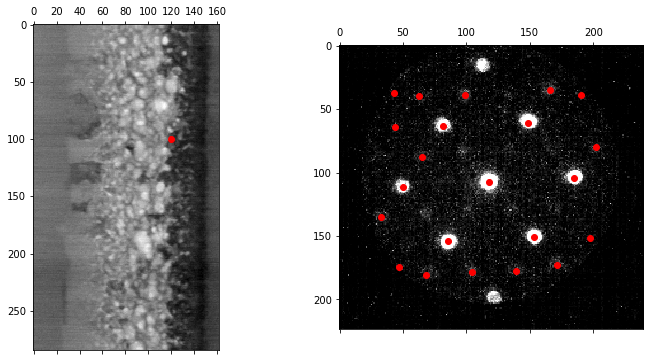

In [15]:
rx,ry = 100,120
power = 0.05

peaks = braggpeaks.get_pointlist(rx,ry)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.matshow(ave_im)
ax1.scatter(ry,rx,color='r')
ax2.matshow(dc.data4D[rx,ry,:,:]**power, vmin=np.median(dc.data4D[rx,ry,:,:]**power),vmax=np.median(dc.data4D[rx,ry,:,:]**power+4*np.std(dc.data4D[rx,ry,:,:]**power)))
ax2.scatter(peaks.data['qy'],peaks.data['qx'],color='r')
plt.show()

In [ ]:
# Mask Bragg disks